In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from pandas import ExcelWriter

%matplotlib inline

In [2]:
organisms = [
                    ["Escherichia coli",         "up000000625", 'uniprot-proteome_UP000000625.xlsx', "Prokaryote"],
                    ["Helicobacter pylori",      "up000000429", 'uniprot-proteome_UP000000429.xlsx', "Prokaryote"],
                    ["Bacillus subtilis",        "up000001570", 'uniprot-proteome_UP000001570.xlsx', "Prokaryote"],
                    ["Dictyostelium discoideum", "up000002195", 'uniprot-proteome_UP000002195.xlsx', "Eukaryote, unicellular"],
                    ["Saccharomyces cerevisiae", "up000002311", 'uniprot-proteome_UP000002311.xlsx', "Eukaryote, unicellular"],
                    ["Drosophila melanogaster",  "up000000803", 'uniprot-proteome_UP000000803.xlsx', "Eukaryote"],
                    ["Mus musculus",             "up000000589", 'uniprot-proteome_UP000000589.xlsx', "Eukaryote"],
                    ["Zebrafish",                "up000000437", 'uniprot-proteome_UP000000437.xlsx', "Eukaryote"],
                    ["Homo sapiens",             "up000005640", 'uniprot-proteome_UP000005640.xlsx', "Eukaryote"],
            ]

In [3]:
oligomer_degree = [ 
                    ["Monomer",      1, "1-mer"], 
                    ["Homodimer",    2, "2-mer"],
                    ["Homotrimer",   3, "3-mer"],
                    ["Homotetramer", 4, "4-mer"],
                    ["Homopentamer", 5, "5-mer"],
                    ["Homohexamer",  6, "6-mer"],
                    ["Homoheptamer", 7, "7-mer"],
                    ["Homooctamer",  8, "8-mer"], 
#                   ["Homononamer",  9, "9-mer"],
#                   ["Homodecamer",  10,"10-mer"],
#                   ["Homododecamer",12,"11-mer"]
                  ]

In [4]:
gene_ontology_ml     = [  
                        ["GO_0003824","catalytic"], 
                        #["GO_0005198","structural"],
                        ["GO_0005215","transporter"],
                        ["GO_0005488","binding"], 
                        #["GO_0140110","transcription regulator"]
                       ]

gene_ontology_cc = [ 
                            ["GO_0044422", "organelle part"],
                            ["GO_0044425", "membrane part"],
                            ["GO_0044464", "cell part"]
                            
                   ]

gene_ontology_cc_mp = [ 
                            ["GO_0031224", "intrinsic component of membrane"],
                            ["GO_0044459", "plasma membrane part"],
                            ["GO_0098796", "membrane protein complex"],
                            
                     ]

gene_ontology_cc_cp = [ 
                            ["GO_0031224", "intrinsic component of membrane"],
                            ["GO_0042597", "periplasmic space"],
                            ["GO_0005886", "plasma membrane"],                            
                            ["GO_0005829", "cytosol"]                            
                      ]

gene_ontology_bp     = [ 
                            ["GO_0008152", "metabolic process"],                            
                            ["GO_0009987", "cellular process"],
                            ["GO_0050896", "response to stimulus"],
                            ["GO_0051179", "localization"],
                            ["GO_0065007", "biological regulation"],    
                            ["GO_0071840", "cellular component organization"],
                       ]

gene_ontology_bp_mp  = [ 
                            ["GO_0006807", "nitrogen compound"],                            
                            ["GO_0009056", "catabolic process"],
                            ["GO_0009058", "biosynthetic process"],
                            ["GO_0055114", "oxidation-reduction process"],
                       ]


In [5]:
gene_ontology =  [
                    ["Molecular function",                    gene_ontology_ml,    "GO:0003674"],
                    ["Cellular Component",                    gene_ontology_cc,    "GO:0005575"],
                    ["Cellular Component - membrane part",    gene_ontology_cc_mp, "GO:0044425"],
                    ["Cellular Component - cell part",        gene_ontology_cc_cp, "GO:0044464"],
                    ["Biological process",                    gene_ontology_bp,    "GO:0008150"],
                    ["Biological process - metabolic process",gene_ontology_bp_mp, "GO:0008152"]
                 ]

In [6]:
def find_freq(df):
    df_freq = pd.DataFrame()    

    pro_count = np.zeros(len(oligomer_degree))

    for idx, degree in enumerate(oligomer_degree):
         pro_count[idx] = len(df[df['Subunit structure [CC]'].str.startswith("SUBUNIT: "+degree[0], na=False)])
        
    pro_number = sum(pro_count)
    pro_freq = np.array([ pro_count / pro_number])
    
    df_freq = pd.DataFrame()
    df_freq["type"] = [i[2] for i in oligomer_degree] 
    df_freq["subunits"] = [i[1] for i in oligomer_degree] 
    df_freq["count"] = pro_count.T
    df_freq["frequency"] = pro_freq.T
    
    #print(pro_number)
    #print(df_freq)

    return df_freq, np.sum(pro_count)

In [7]:
def save_excel(df_all, exl_file):
    writer = ExcelWriter(exl_file)
    df_all.to_excel(writer)
    writer.save()

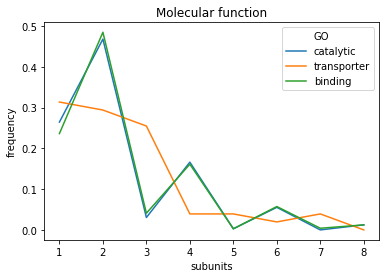

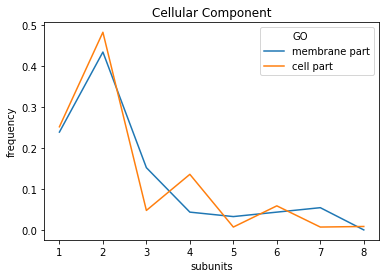

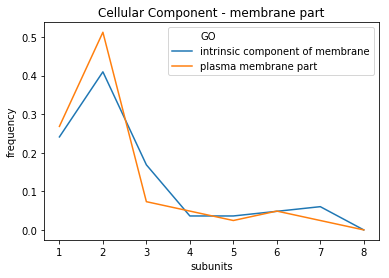

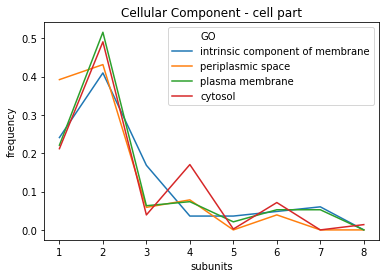

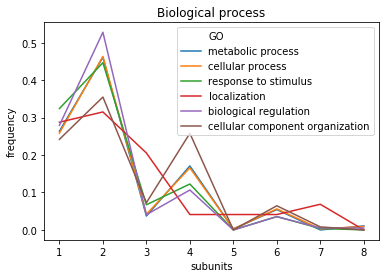

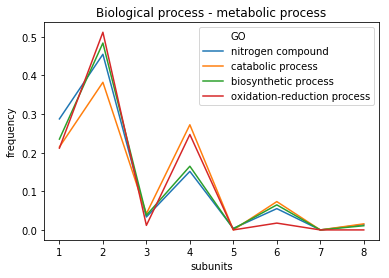

In [8]:

organim = organisms[0]
for go in gene_ontology:
    df_collection = [] 
    for sub_go in go[1]:
        file = r'.\%s\%s\uniprot_%s.xlsx' % (organim[0],go[0], sub_go[0])
        df_t,known = find_freq(pd.read_excel(file))

        if known >= 30:
            df_t["GO"] = sub_go[1]
            df_t["GO group"] = go[0]
            df_collection.append(df_t)

    df_all = pd.concat(df_collection)

    res_file_name = r'.\%s\%s\uniprot_report' % (organim[0],go[0])
    save_excel(df_all, res_file_name + '.xlsx')


    plt.figure()
    sns.lineplot(data=df_all, x = "subunits", y = "frequency", hue="GO").set_title(go[0]) 
    plt.savefig(res_file_name + '.png')


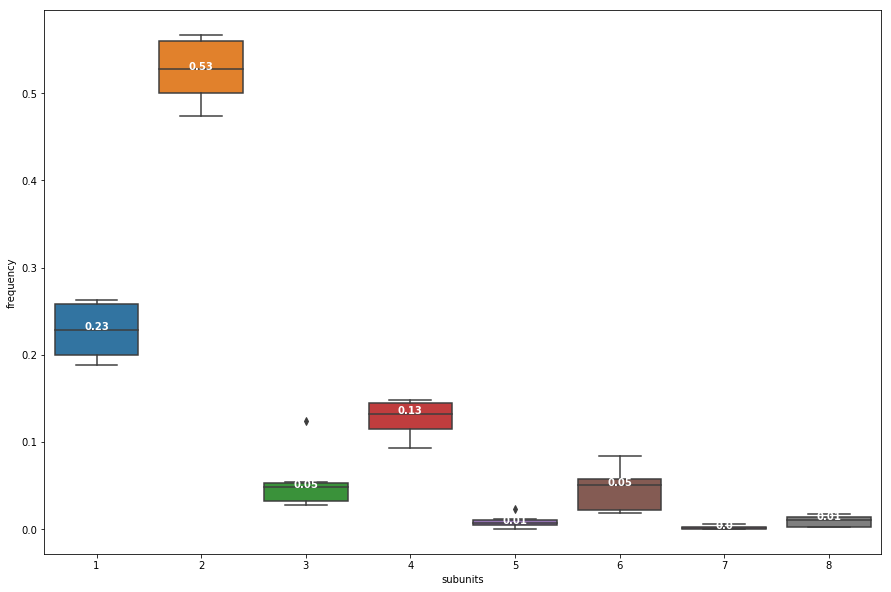

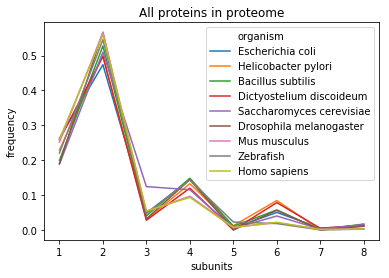

In [9]:
df_freq_proteome = pd.DataFrame() 
df_freq_proteome_ex = pd.DataFrame()  

for i,organim in enumerate(organisms):
    
    file = r'.\%s\uniprot-proteome_%s.xlsx' % (organim[0],organim[1])
    df_org,known = find_freq(pd.read_excel(file))
    df_org.drop('type',axis=1, inplace=True)
    df_org.drop('count',axis=1, inplace=True)
    df_org["organism"] = organim[0]
    df_freq_proteome = pd.concat([df_freq_proteome, df_org])
    df_freq_proteome_ex = pd.concat([df_freq_proteome_ex,  df_org.pivot_table("frequency", 'organism', 'subunits')])

save_excel(df_freq_proteome_ex, 'proteome_freq.xlsx')

plt.figure(figsize=(15,10))
ax = sns.boxplot(x="subunits", y = "frequency", data = df_freq_proteome)

medians = df_freq_proteome.groupby(['subunits'])['frequency'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

%pos = range(len(medians))
%for tick,label in zip(pos,ax.get_xticklabels()):
    %ax.text(pos[tick], medians[tick], median_labels[tick], 
            %horizontalalignment='center', color='w', weight='semibold')
    
%plt.savefig('proteome_freq1.png')


plt.figure()
sns.lineplot(data=df_freq_proteome, x = "subunits", y = "frequency", hue="organism").set_title("All proteins in proteome") 
plt.savefig('proteome_freq2.png')
